In [1]:
import nbsetup
import ensemblepy as ep

import numpy as np
import seaborn as sns
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
def mixed(percent, count=100, val=1):
    p = int(count*(1-percent))
    return np.concatenate([np.ones(p)*val, np.linspace(0, 1, count-p)])

In [130]:
def discrete(dist, bins):
    bb = np.linspace(0,1,bins+1)
    h, _ = np.histogram(dist, bins=bb)
    return sp.stats.entropy(h)

In [196]:
count = 50
def spread(count, over=np.linspace(0.0001,1,50), func=lambda v,c:np.linspace(0,v,c)):
    dists, scatter = [], []
    
    for i, v in enumerate(over):
        d = func(v,count)
        dists.append({
            'x': i,
            'dv': ep.density_variance(d, bounded=False),
            'few': discrete(d, 3),
            'some': discrete(d, count//10),
            'many': discrete(d, count),
        })
        for point in d:
            scatter.append({'x': i, 'y': point})
    
    return pd.DataFrame(scatter), pd.DataFrame(dists)

<AxesSubplot:xlabel='x', ylabel='dv'>

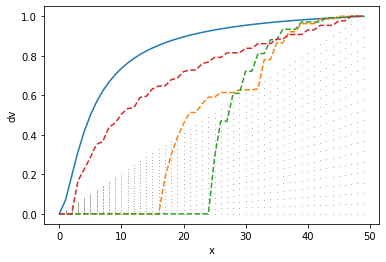

In [197]:
scatter, dists = spread(20)


sns.scatterplot(data=scatter, x='x', y='y', s=1, color='grey').set(xlabel=None, ylabel=None)
sns.lineplot(data=dists, x='x', y='dv')
sns.lineplot(x=dists['x'], y=dists['few']/dists['few'].max(), linestyle='dashed')
sns.lineplot(x=dists['x'], y=dists['some']/dists['some'].max(), linestyle='dashed')
sns.lineplot(x=dists['x'], y=dists['many']/dists['many'].max(), linestyle='dashed')

<AxesSubplot:xlabel='x', ylabel='dv'>

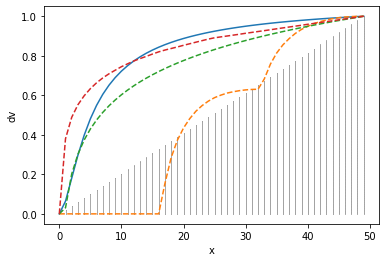

In [198]:
scatter, dists = spread(500)

sns.scatterplot(data=scatter, x='x', y='y', s=1, color='grey').set(xlabel=None, ylabel=None)
sns.lineplot(data=dists, x='x', y='dv')
sns.lineplot(x=dists['x'], y=dists['few']/dists['few'].max(), linestyle='dashed')
sns.lineplot(x=dists['x'], y=dists['some']/dists['some'].max(), linestyle='dashed')
sns.lineplot(x=dists['x'], y=dists['many']/dists['many'].max(), linestyle='dashed')

<AxesSubplot:xlabel='x', ylabel='dv'>

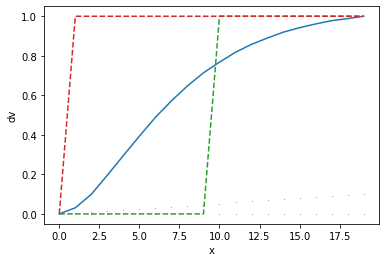

In [208]:
scatter, dists = spread(200, np.linspace(0,0.1,20), lambda v,c: np.concatenate([np.zeros(c), np.ones(c)*v]))

sns.scatterplot(data=scatter, x='x', y='y', s=1, color='grey').set(xlabel=None, ylabel=None)
sns.lineplot(x=dists['x'], y=dists['dv']/dists['dv'].max())
sns.lineplot(x=dists['x'], y=dists['few']/dists['few'].max(), linestyle='dashed')
sns.lineplot(x=dists['x'], y=dists['some']/dists['some'].max(), linestyle='dashed')
sns.lineplot(x=dists['x'], y=dists['many']/dists['many'].max(), linestyle='dashed')